# LINEAR REGRESSION FOR MULTIPE VARIABLES


# Employee Attrition Prediction

## Importing Relevant Packages

In [2]:
# Import the pandas library as 'pd' for data manipulation and analysis
import pandas as pd

# Import the numpy library as 'np' for numerical operations and calculations
import numpy as np

# Import the matplotlib.pyplot library as 'plt' for data visualization
import matplotlib.pyplot as plt

# Import linear_model from the scikit-learn (sklearn) library for machine learning
from sklearn import linear_model

# Print a message to indicate that the necessary packages have been imported
print("Packages imported!")


Packages imported!


## Reading Dataset 

In [3]:
# Define the file path to the CSV file containing the dataset
path = "HR-Employee-Attrition.csv"

# Use pandas to read the data from the CSV file into a DataFrame named 'df'
df = pd.read_csv(path)

# Display the first few rows of the DataFrame to inspect the data
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Display summary information about the DataFrame 'df,' including data types, non-null values, and memory usage
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Data Cleaning

Transforming Attrittion to numerical values

In [15]:
df['Attrition'] = df['Attrition'].replace({'Yes': 1, 'No': 0})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Selecting only numericl variables

In [18]:
# Assuming 'df' is your DataFrame
df = df.select_dtypes(include='number')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   DailyRate                 1470 non-null   int64
 3   DistanceFromHome          1470 non-null   int64
 4   Education                 1470 non-null   int64
 5   EmployeeCount             1470 non-null   int64
 6   EmployeeNumber            1470 non-null   int64
 7   EnvironmentSatisfaction   1470 non-null   int64
 8   HourlyRate                1470 non-null   int64
 9   JobInvolvement            1470 non-null   int64
 10  JobLevel                  1470 non-null   int64
 11  JobSatisfaction           1470 non-null   int64
 12  MonthlyIncome             1470 non-null   int64
 13  MonthlyRate               1470 non-null   int64
 14  NumCompaniesWorked        1470 non-null 

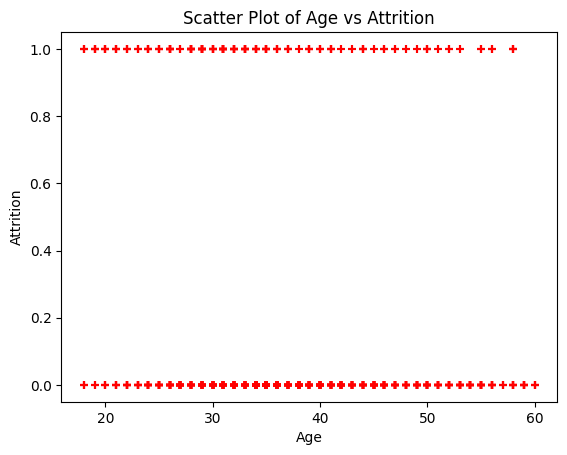

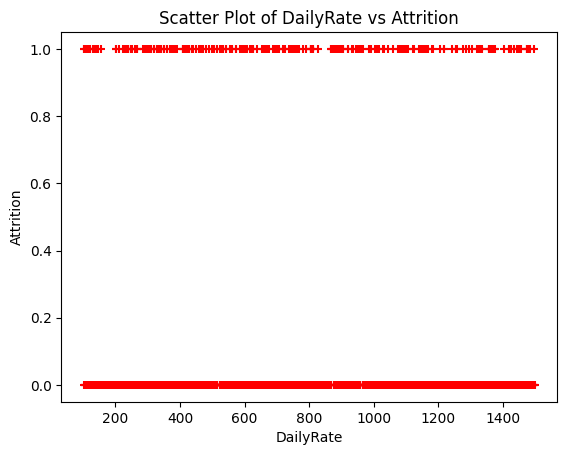

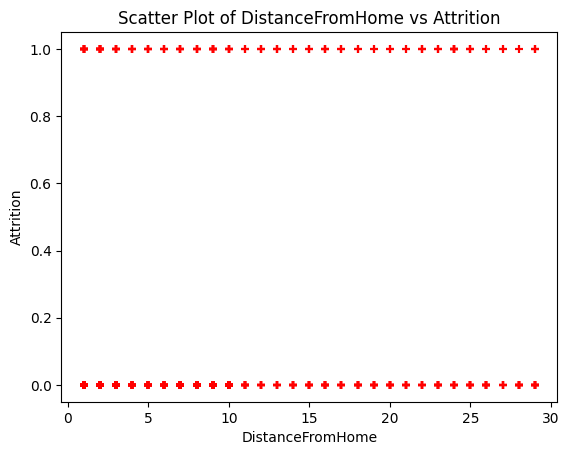

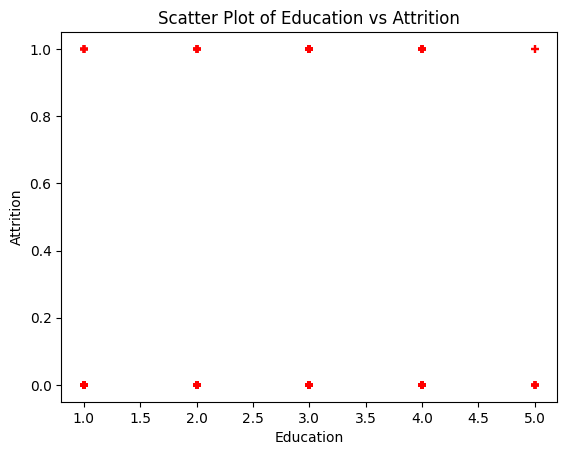

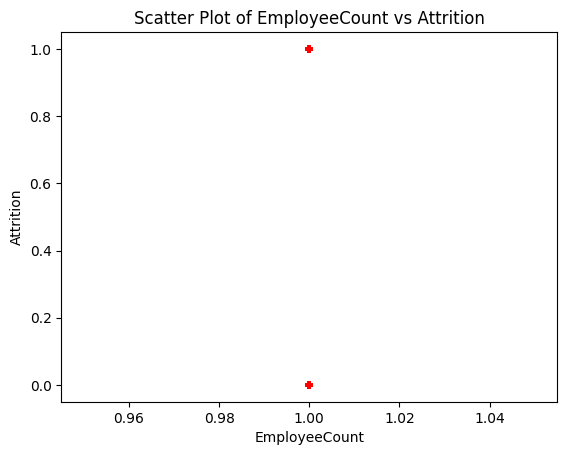

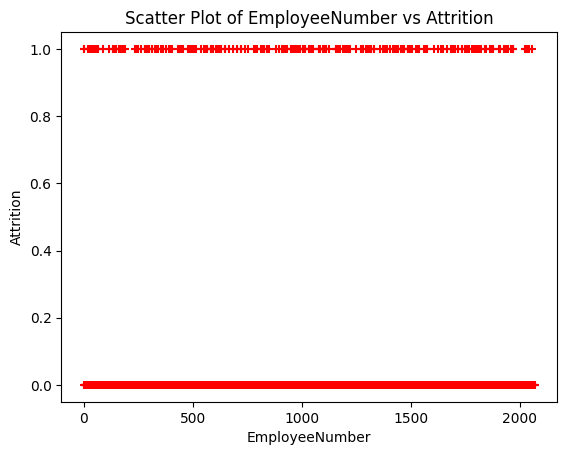

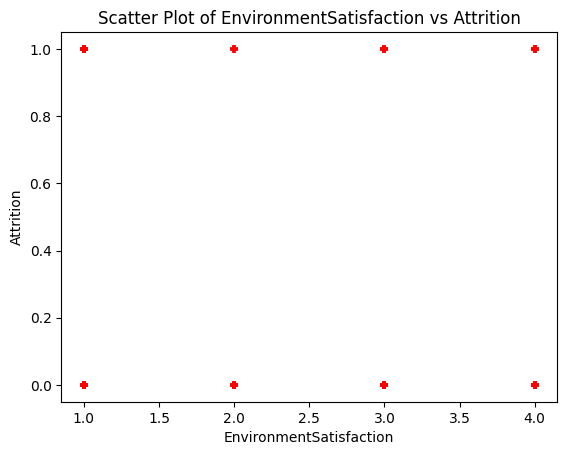

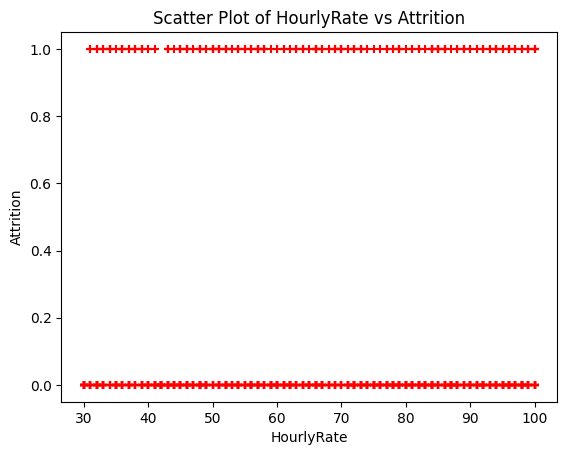

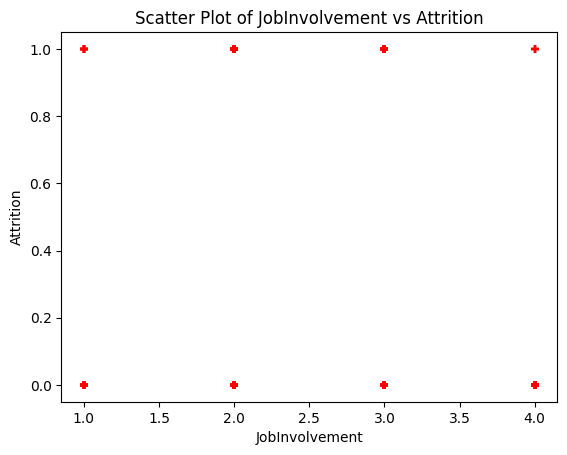

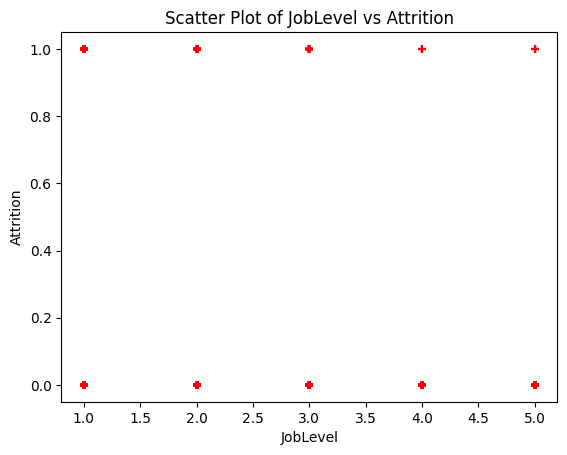

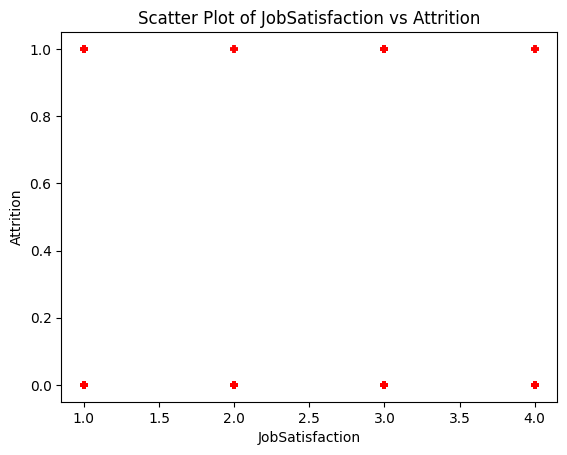

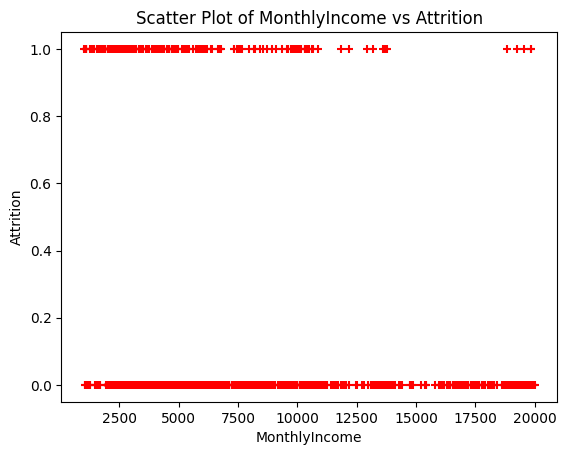

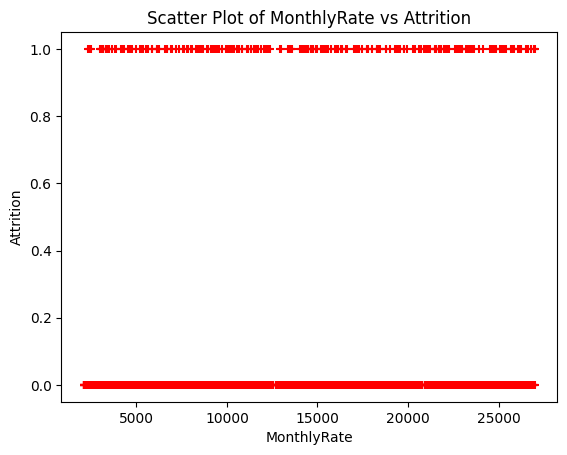

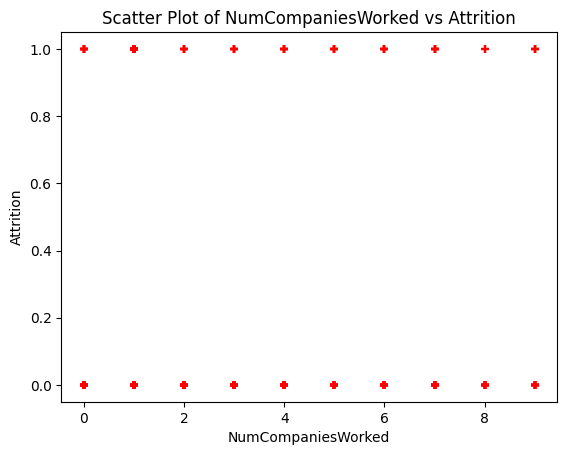

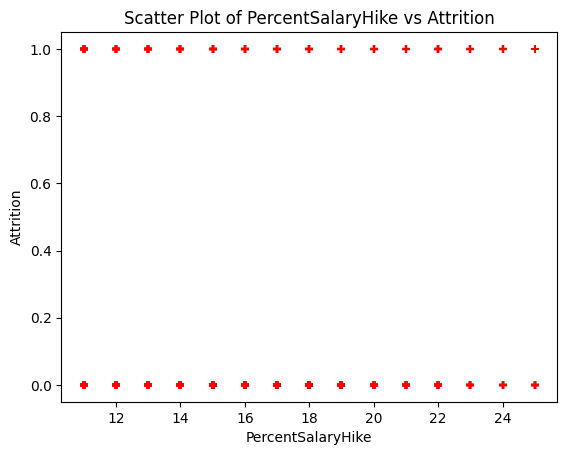

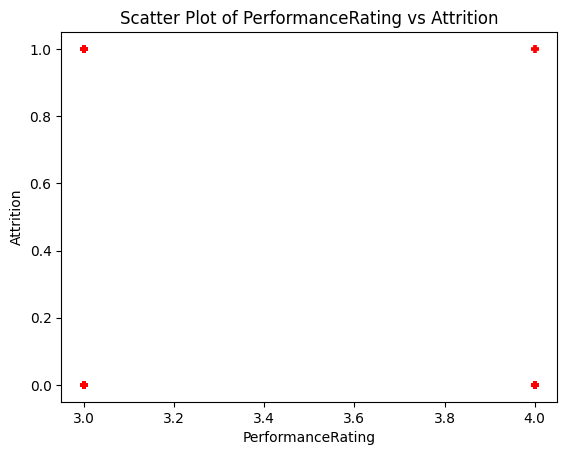

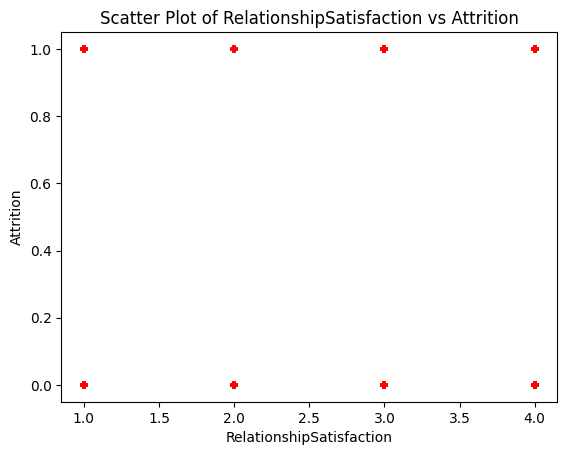

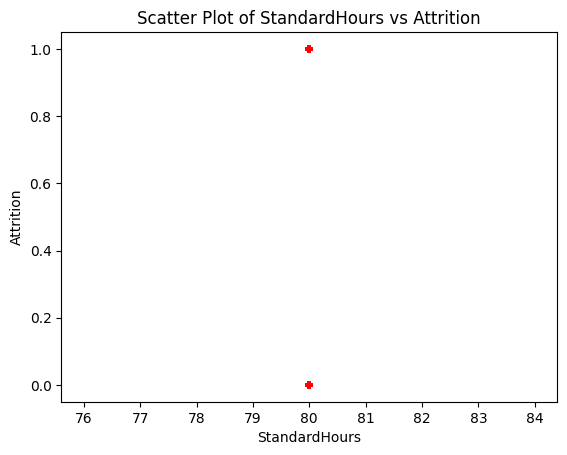

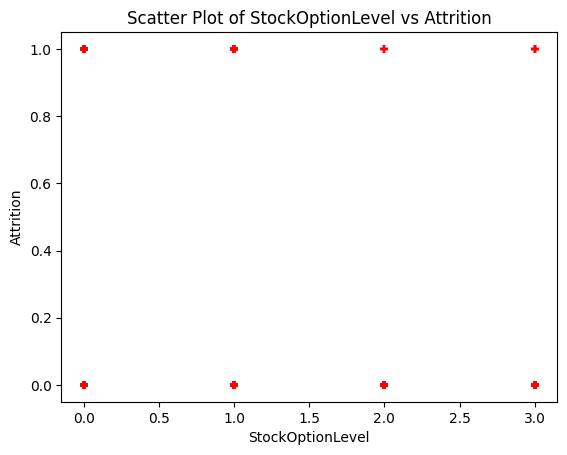

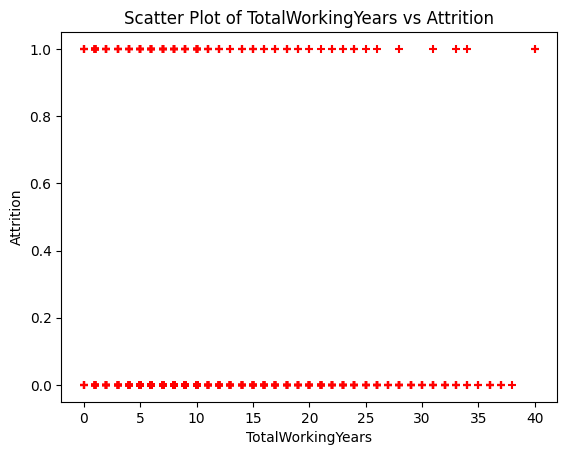

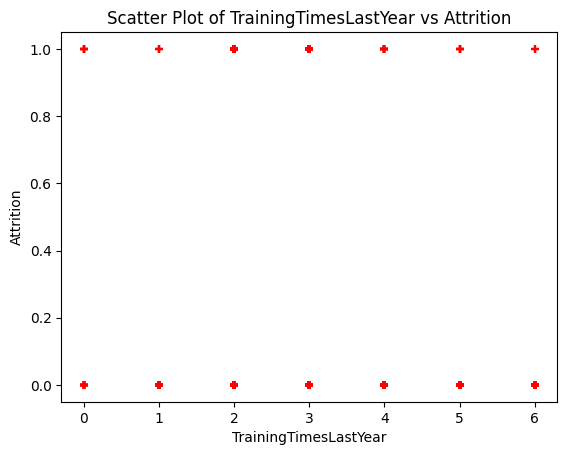

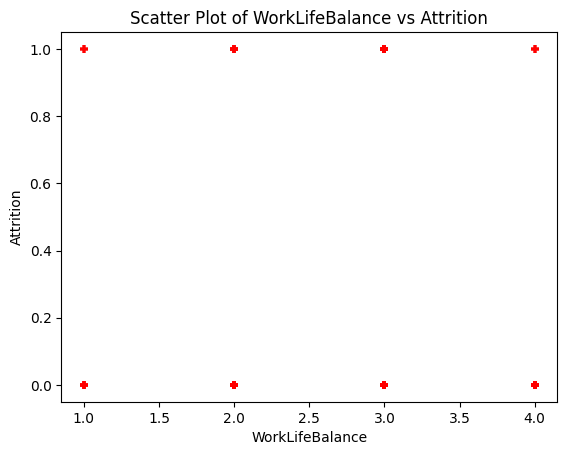

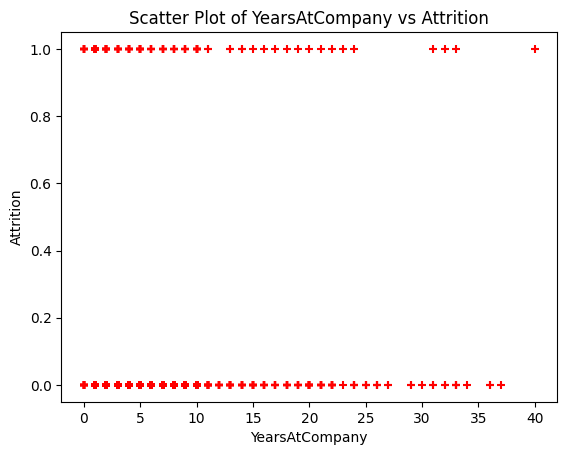

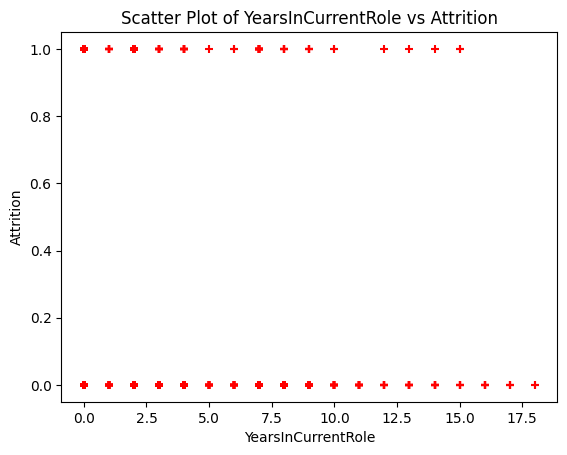

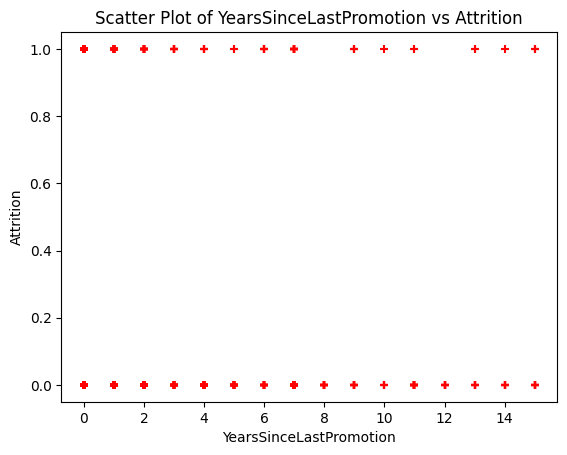

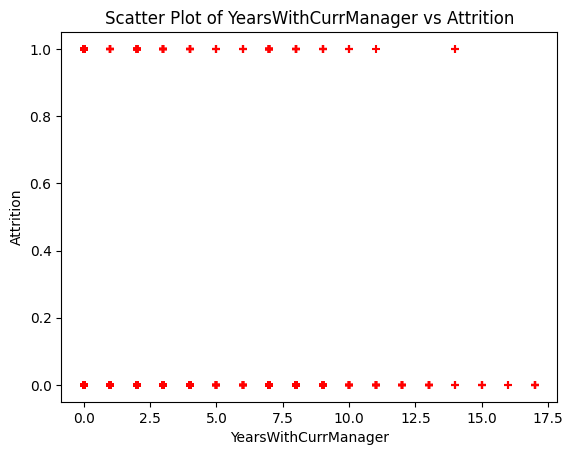

In [22]:
%matplotlib inline


# Assuming 'df' is your DataFrame and 'Attrition' is the column you want to plot against
y_column = 'Attrition'
x_columns = [col for col in df.columns if col != y_column]

# Create a scatter plot for each X variable against 'Attrition'
for x_col in x_columns:
    plt.scatter(df[x_col], df[y_column], color="red", marker="+")
    plt.xlabel(x_col)
    plt.ylabel(y_column)
    plt.title(f'Scatter Plot of {x_col} vs {y_column}')
    plt.show()


## Training LinearRegression Model

In [5]:
# Create a LinearRegression object called 'reg' from the scikit-learn library
reg = linear_model.LinearRegression()

# Create an object for linear regression modeling

# Train the Linear Regression Model using the 'year' column as the input feature
# and the 'per capita income (US$)' column as the target variable
reg.fit(df[["year"]], df["per capita income (US$)"])

# Display a message to indicate that the model is ready for making predictions
print("The model is ready for prediction")


The model is ready for prediction


In [6]:
# Use the trained 'reg' Linear Regression model to predict the per capita income for the year 1971
reg.predict([[1971]])


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([693.9054085])

In [7]:
# Access the coefficient (slope) of the linear regression model, which represents the relationship between the input feature and the target variable
reg.coef_


array([828.46507522])

In [8]:
# Access the intercept (bias) term of the linear regression model, which represents the value of the target variable when the input feature is zero
reg.intercept_


-1632210.7578554575

## Linear Regression Equation

### y = m*x + b

### per_capita_income =  828.46507522*year + -1632210.7578554575

## Prediction for year 2020

In [9]:
# Prompt the user to enter the year for which they want to predict per capita income
year = float(input("Enter the year you want to predict:"))

# Calculate the per capita income for the entered year using a linear equation
per_capita_income = 828.46507522 * year + (-1632210.7578554575)

# Display the calculated per capita income for the entered year with appropriate formatting
print(f'The per capita income for the year {int(year)} is : ${per_capita_income:.2f}')


Enter the year you want to predict: 2020


The per capita income for the year 2020 is : $41288.69


# Visualisation for Linear Regression

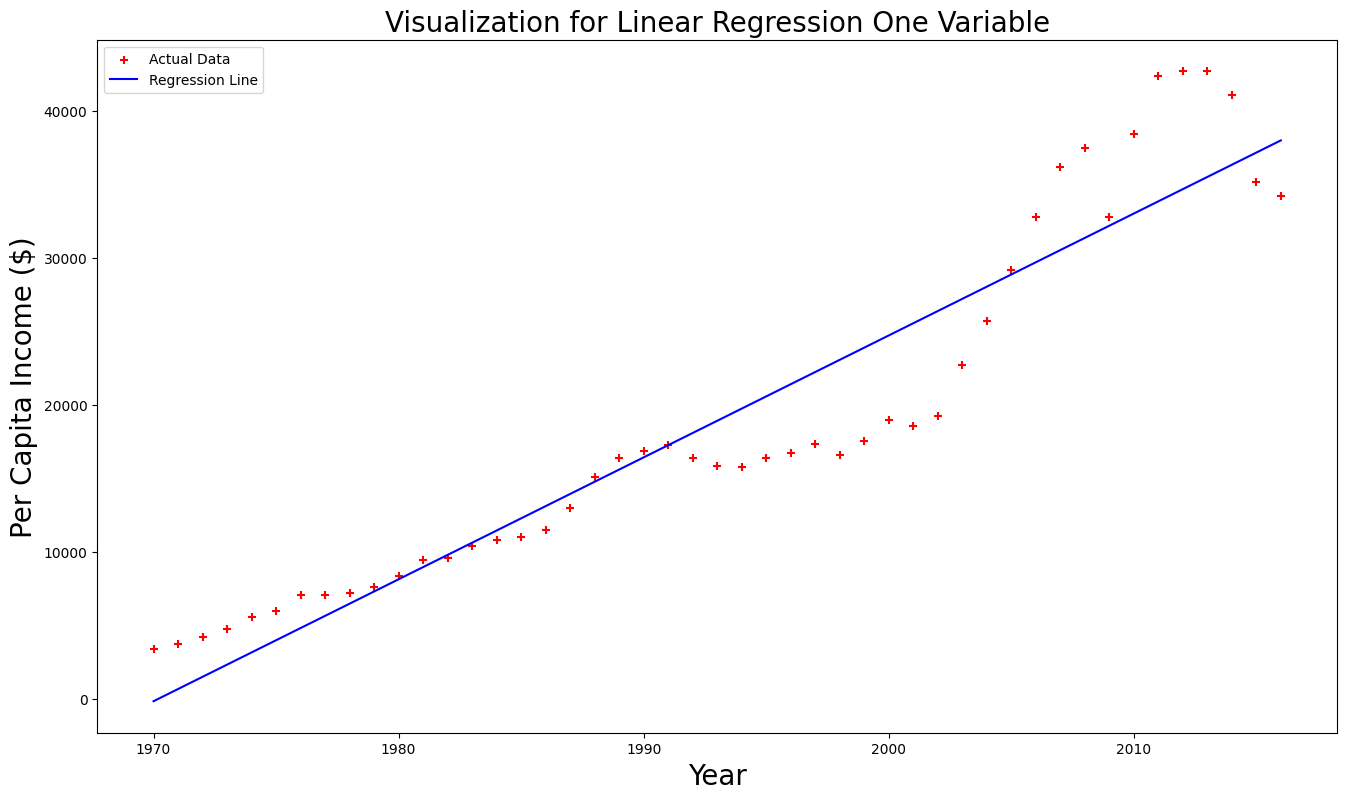

In [10]:

# Set the size of the figure
plt.figure(figsize=(16, 9))

# Set the title and labels
plt.title("Visualization for Linear Regression One Variable", fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Per Capita Income ($)", fontsize=20)

# Scatter plot for the actual data points
plt.scatter(df["year"], df["per capita income (US$)"], color="red", marker="+", label="Actual Data")

# Plot the regression line
plt.plot(df["year"], reg.predict(df[["year"]]), color='blue', label="Regression Line")

# Save the plot as an image
plt.savefig("LinearRegression_OneVariable.png")

# Display the plot
plt.legend()
plt.show()
